# Loading the data

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [33]:
data=pd.read_csv(r'./cancer-risk-factors.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Pre-processing the data

In [34]:
print(data['Risk_Level'].unique())

['Medium' 'Low' 'High']


In [35]:
risk_weight={'Low':0,'Medium':1,'High':2}
data['Risk_Level']=data['Risk_Level'].map(risk_weight)

In [36]:
print(data['Risk_Level'].unique())

[1 0 2]


In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Feature Selection

In [38]:
X=data.drop(columns=['Patient_ID','Cancer_Type'])
y=data['Cancer_Type']

In [39]:
print(y.unique())

['Breast' 'Prostate' 'Skin' 'Colon' 'Lung']


In [40]:
print(X.head(),y.head())

   Age  Gender  Smoking  Alcohol_Use  Obesity  Family_History  Diet_Red_Meat  \
0   68       0        7            2        8               0              5   
1   74       1        8            9        8               0              0   
2   55       1        7           10        7               0              3   
3   61       0        6            2        2               0              6   
4   67       1       10            7        4               0              6   

   Diet_Salted_Processed  Fruit_Veg_Intake  Physical_Activity  Air_Pollution  \
0                      3                 7                  4              6   
1                      3                 7                  1              3   
2                      3                 4                  1              8   
3                      2                 4                  6              4   
4                      3                10                  9             10   

   Occupational_Hazards  BRCA_Mutation

In [41]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy')

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis = 0)

feature_mapping={}
for i in range(len(X.columns)):
    if feature_importance_normalized[i]>=0.005:
        feature_mapping[X.columns[i]]=feature_importance_normalized[i]

for i in feature_mapping:
    print(i,":",feature_mapping[i])


Age : 0.00904554076184876
Gender : 0.0158541022964015
Smoking : 0.03293651937931152
Obesity : 0.0070630477234138135
Diet_Red_Meat : 0.016616767646105948
Diet_Salted_Processed : 0.005912856161085105
Fruit_Veg_Intake : 0.008355426644543506
Air_Pollution : 0.025354959473990926
Occupational_Hazards : 0.010195799806990376
Calcium_Intake : 0.00896763022646344


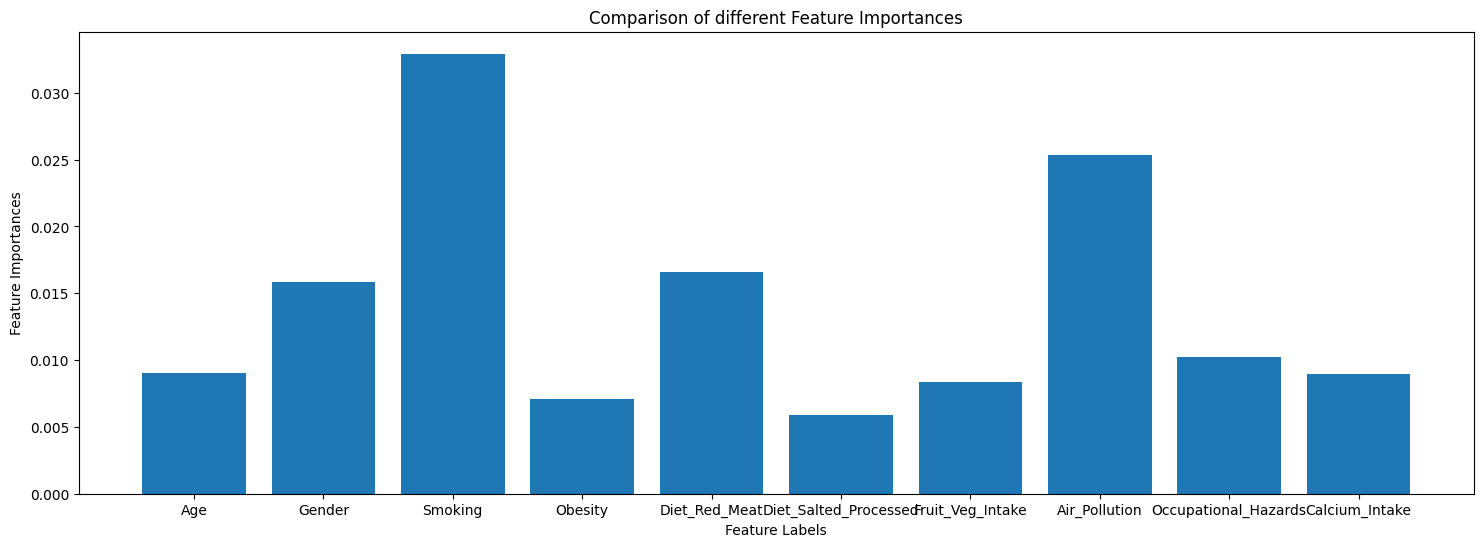

In [42]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(18,6))
plt.bar(feature_mapping.keys(),feature_mapping.values())
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [43]:
dropped_columns=[i for i in X.columns if i not in feature_mapping]
print(dropped_columns)

['Alcohol_Use', 'Family_History', 'Physical_Activity', 'BRCA_Mutation', 'H_Pylori_Infection', 'Overall_Risk_Score', 'BMI', 'Physical_Activity_Level', 'Risk_Level']


In [44]:
X.drop(columns=dropped_columns,inplace=True)

# Train-test splitting

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=101)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# printing out train and test sets

print('X_train : ')
print(X_train)

print('')
print('y_train : ')
print(y_train)

(1400, 10)
(600, 10)
(1400,)
(600,)
X_train : 
[[-0.58757694 -0.95118973 -0.93125996 ...  0.83314451  0.00199253
  -0.9680105 ]
 [ 1.03473526 -0.95118973  1.18327841 ... -0.11233156  1.24178898
  -1.29559443]
 [-0.30128655  1.05131497 -1.23333687 ... -1.68812502  0.00199253
   0.01474128]
 ...
 [ 1.22559552  1.05131497 -1.53541378 ... -0.74264894  0.00199253
   0.01474128]
 [-1.4464481  -0.95118973  1.18327841 ... -0.11233156 -0.92785481
   0.66990913]
 [ 0.843875    1.05131497 -0.32710614 ...  1.1483032   0.62189076
   0.99749306]]

y_train : 
1976      Breast
307       Breast
705     Prostate
737         Skin
1725        Lung
          ...   
248     Prostate
1297        Lung
943         Skin
703         Lung
1827    Prostate
Name: Cancer_Type, Length: 1400, dtype: object


# Prediction

In [46]:
print(y_test)

159       Skin
1902      Skin
173       Lung
1514      Lung
1279    Breast
         ...  
820       Skin
1497    Breast
1979      Skin
1362     Colon
1460    Breast
Name: Cancer_Type, Length: 600, dtype: object


## Logistic Regression

In [ ]:
logreg = LogisticRegression(solver="lbfgs", C=5) 
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)

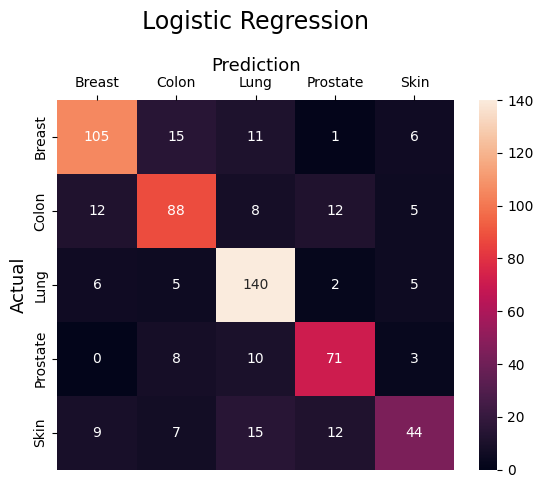

In [68]:
cm = confusion_matrix(np.array(y_test),y_pred_log)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Logistic Regression', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [51]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

      Breast       0.80      0.76      0.78       138
       Colon       0.72      0.70      0.71       125
        Lung       0.76      0.89      0.82       158
    Prostate       0.72      0.77      0.75        92
        Skin       0.70      0.51      0.59        87

    accuracy                           0.75       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.75      0.74       600



## 2. Decision Tree Classifier

In [60]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

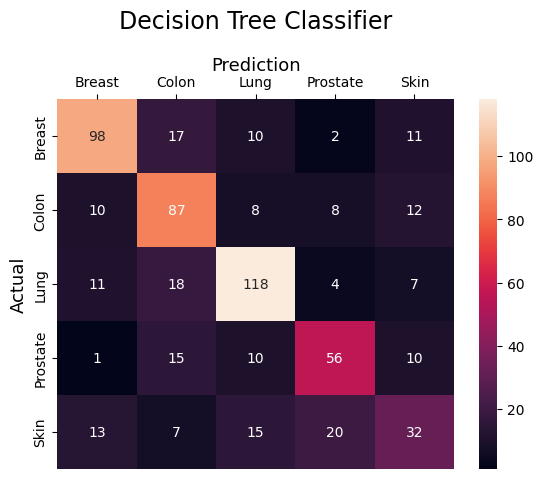

In [69]:
cm = confusion_matrix(np.array(y_test),y_pred_dtc)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Decision Tree Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [62]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

      Breast       0.74      0.71      0.72       138
       Colon       0.60      0.70      0.65       125
        Lung       0.73      0.75      0.74       158
    Prostate       0.62      0.61      0.62        92
        Skin       0.44      0.37      0.40        87

    accuracy                           0.65       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.65      0.65      0.65       600



## 3. K-Nearest Neighbor Classifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

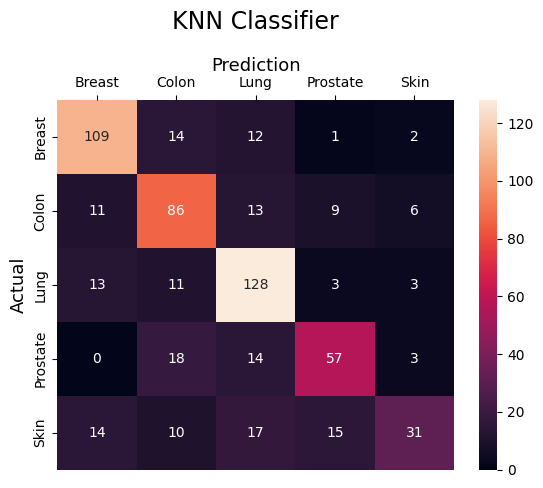

In [86]:
cm = confusion_matrix(np.array(y_test),y_pred_knn)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('KNN Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [71]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

      Breast       0.74      0.79      0.76       138
       Colon       0.62      0.69      0.65       125
        Lung       0.70      0.81      0.75       158
    Prostate       0.67      0.62      0.64        92
        Skin       0.69      0.36      0.47        87

    accuracy                           0.69       600
   macro avg       0.68      0.65      0.66       600
weighted avg       0.69      0.69      0.68       600



## 4. Naive Bayes Classifier - Gaussian or Multinomial

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

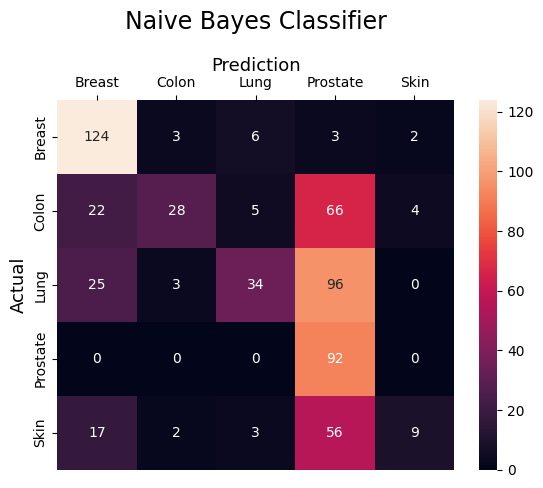

In [82]:
cm = confusion_matrix(np.array(y_test),y_pred_gnb)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Naive Bayes Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [80]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

      Breast       0.66      0.90      0.76       138
       Colon       0.78      0.22      0.35       125
        Lung       0.71      0.22      0.33       158
    Prostate       0.29      1.00      0.45        92
        Skin       0.60      0.10      0.18        87

    accuracy                           0.48       600
   macro avg       0.61      0.49      0.41       600
weighted avg       0.63      0.48      0.43       600



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

ValueError: Negative values in data passed to MultinomialNB (input X).

## 5. Ensemble Model - Random Forest

## 6. Ensemble Model - XGBoost

# Accuracy Metrics

In [74]:
def true_positive(y_true, y_pred,c):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp == c:
            tp += 1
    return tp

def true_negative(y_true, y_pred,c):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt !=c and yp != c:
            tn += 1
    return tn

def false_positive(y_true, y_pred,c):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != c and yp == c:
            fp += 1
    return fp

def false_negative(y_true, y_pred,c):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp != c:
            fn += 1
    return fn

def accuracy(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    tn=true_negative(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)
    return (tp+tn)/(tp+tn+fp+fn)

def precision(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)    
    return tp/(tp+fp)

def recall(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)    
    return tp/(tp+fn)

def f1(y_true, y_pred,c):
    p=precision(y_true,y_pred,c)
    r=recall(y_true,y_pred,c)    
    return 2*p*r/(p+r)

def macro_accuracy(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=accuracy(y_true,y_pred,i)
    return val/len(lst)

def macro_precision(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=precision(y_true,y_pred,i)
    return val/len(lst)

def macro_recall(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=recall(y_true,y_pred,i)
    return val/len(lst)

def macro_f1(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=f1(y_true,y_pred,i)
    return val/len(lst)

lst=list(y_train.unique())


In [78]:
print("For logistic regresion")
model=logreg
y_pred_m=y_pred_log
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For logistic regresion
Accuracy:  89.86666666666666
Precision:  73.89347518949096
Recall:  72.56863542912087
F1:  72.80407470288625
MCC:  67.91704628101851
AUC:  94.04150114438636


In [77]:
print("For Decision Tree Classifier")
model=dtc
y_pred_m=y_pred_dtc
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Decision Tree Classifier
Accuracy:  86.06666666666666
Precision:  62.811893865097524
Recall:  62.58984229404285
F1:  62.5559926410394
MCC:  55.85453797532784
AUC:  76.91547627661339


In [88]:
print("For KNN Classifier")
y_pred_m=y_pred_knn
model=knn
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For KNN Classifier
Accuracy:  87.4
Precision:  68.30661865413458
Recall:  65.27737422428025
F1:  65.57460420439902
MCC:  60.02190375631679
AUC:  87.6041513901612


In [89]:
print("For Gaussian NB Classifier")
y_pred_m=y_pred_gnb
model=gnb
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Gaussian NB Classifier
Accuracy:  79.13333333333334
Precision:  60.792305833125624
Recall:  48.823777478349434
F1:  41.38901893087592
MCC:  41.34255553591044
AUC:  83.1440646370482
